## Different ways to build Keras models

There are three APIs for building models in Keras:
- The Sequential model, the most approachable API -it’s basically a Python list. As such, it’s limited to simple stacks of layers.
- The Functional API, which focuses on graph-like model architectures. It represents a nice mid-point between usability and flexibility, and as such, it’s the most commonly used model-building API.
- Model subclassing, a low-level option where you write everything yourself from scratch. This is ideal if you want full control over every little thing. However, you won’t get access to many built-in Keras features, and you will be more at risk of making mistakes.

### The Sequential model

##### The Sequential class

In [2]:
# The Sequential class
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2024-09-21 10:51:29.734190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Note that it’s possible to build the same model incrementally via the add() method,
which is similar to the append() method of a Python list.

##### A Sequential model built incrementally

In [2]:
# Incrementally building a Sequential model
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

##### Calling a model for the first time to build it

In [3]:
# The summary() method on a model without initialized weights
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In Keras, when we create a Sequential model, the layers are added, but the model doesn't actually initialize the weights until it knows the shape of the input data. We can initialize the weights in two ways:

- By calling the model on some data: For instance, providing input to the model (e.g., using the fit or predict methods).
- By calling the build() method: We can explicitly call the build() method on the model and provide an input shape, which forces the model to initialize its weights without needing actual data.


In [4]:
# Calling a model for the first time to build it
model.build(input_shape=(None, 3))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

When building a Sequential model incrementally, it’s useful to be able to print a summary of what the current model looks like after you add each layer. But you can’t print a summary until the model is built! There’s actually a way to have your Sequential built on the fly: just declare the shape of the model’s inputs in advance. You can do this via the Input class.

In [5]:
# Specifying the input shape of your model in advance
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

##### Naming models and layers with the name argument

As you can see, this model happens to be named “sequential_1.” You can give names to everything in Keras—every model, every layer.

In [7]:
# Naming models and layers with the name argument
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer")) 
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### The Functional API

The Sequential model is easy to use, but its applicability is extremely limited: it can only express models with a single input and a single output, applying one layer after the other in a sequential fashion. In practice, it’s pretty common to encounter models with multiple inputs (say, an image and its metadata), multiple outputs (different things you want to predict about the data), or a nonlinear topology.
In such cases, you’d build your model using the Functional API.

##### A SIMPLE EXAMPLE

Let’s start with something simple: the stack of two layers we used in the previous section.

In [8]:
# A simple Functional model with two Dense layers
inputs = keras.Input(shape=(3,), name="my_input")
# This inputs object holds information about the shape and dtype of the data that the model will process.
# >>> inputs.shape
# (None, 3)
# >>> inputs.dtype
# float32
# We call such an object a symbolic tensor. It doesn’t contain any actual data, but it encodes the specifications of the actual tensors of data that the model will see when you use it. 
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

Here’s the summary of our model:

In [9]:
# The summary() method on a Functional model
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

##### MULTI-INPUT, MULTI-OUTPUT MODELS

Unlike this toy model, most deep learning models don’t look like lists—they look like graphs. They may, for instance, have multiple inputs or multiple outputs. It’s for this kind of model that the Functional API really shines.

Let’s say you’re building a system to rank customer support tickets by priority and route them to the appropriate department. Your model has three inputs:
- The title of the ticket (text input)
- The text body of the ticket (text input)
- Any tags added by the user (categorical input, assumed here to be one-hot encoded)

Your model also has two outputs:
- The priority score of the ticket, a scalar between 0 and 1 (sigmoid output)
- The department that should handle the ticket (a softmax over the set of departments)
You can build this model in a few lines with the Functional API.


In [5]:
import tensorflow 
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [6]:
# A multi-input, multi-output Functional model
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# Define model inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# Combine input features into a single tensor, features, by concatenating them.
features = layers.Concatenate()([title, text_body, tags])
# Apply an intermediate layer to recombine input features into richer representations.
features = layers.Dense(64, activation="relu")(features)

# Define model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

# Create the model by specifying its inputs and outputs.
model = keras.Model(inputs=[title, text_body, tags], 
                    outputs=[priority, department])

##### Training a multi-input, multi-output model

In [7]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

You can train your model by calling fit() with lists of input and output data. These lists of data should be in the same order as the inputs you passed to the Model constructor.

In [6]:
# Training a model by providing lists of input and target arrays
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - department_accuracy: 0.2377 - department_loss: 41.7575 - loss: 42.0723 - priority_loss: 0.3148 - priority_mean_absolute_error: 0.4820
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - department_accuracy: 0.5286 - department_loss: 25.5184 - loss: 25.8530 - priority_loss: 0.3346 - priority_mean_absolute_error: 0.4985
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


If you don’t want to rely on input order (for instance, because you have many inputs or outputs), you can also leverage the names you gave to the Input objects and the output layers, and pass data via dictionaries.

In [ ]:
# Training a model by providing dicts of input and target arrays
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict({"title": title_data, "text_body": text_body_data, "tags": tags_data})

##### The power of the Functional API: Access to layer connectivity

A Functional model is an explicit graph data structure. 
This makes it possible to inspect how layers are connected and reuse previous graph nodes (which are layer outputs) as part of new models. It also nicely fits the “mental model” that most researchers use when thinking about a deep neural network: a graph of layers. 
This enables two important use cases: 
- model visualization
- feature extraction

Let’s visualize the connectivity of the model we just defined (the topology of the model). 
We can plot a Functional model as a graph with the plot_model() utility.

###### Model visualization

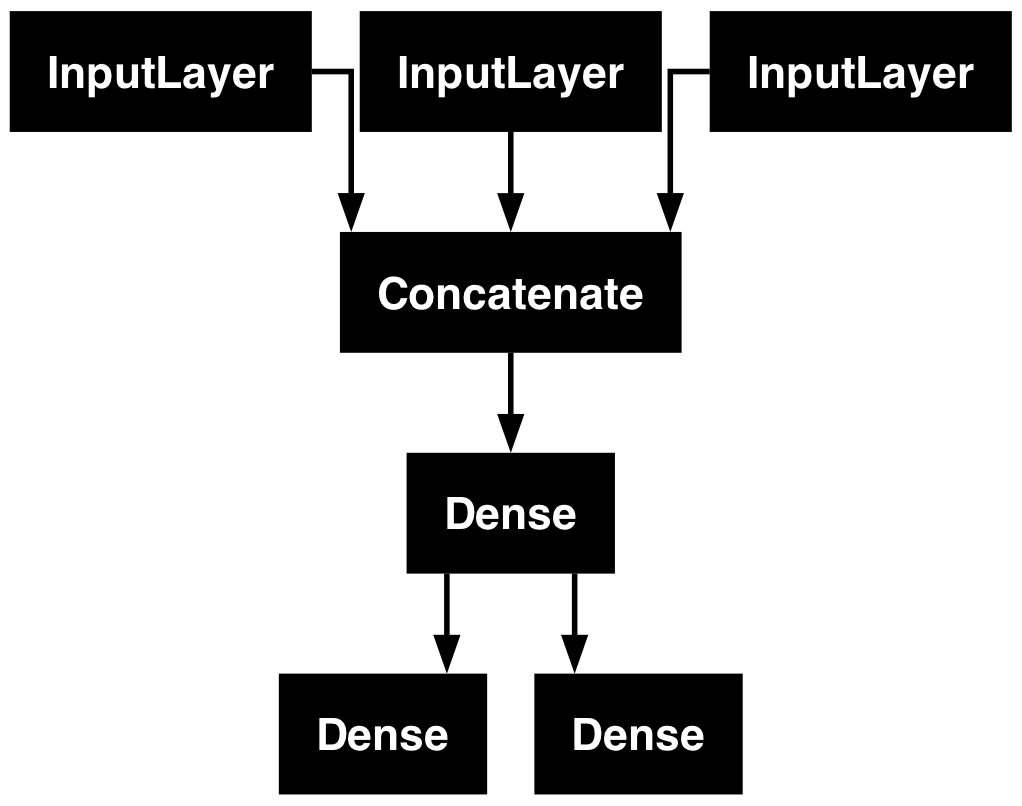

In [6]:
# Graphical visualization of the model
plot_model(model, "ticket_classifier.png")

You can add to this plot the input and output shapes of each layer in the model, which can be helpful during debugging.

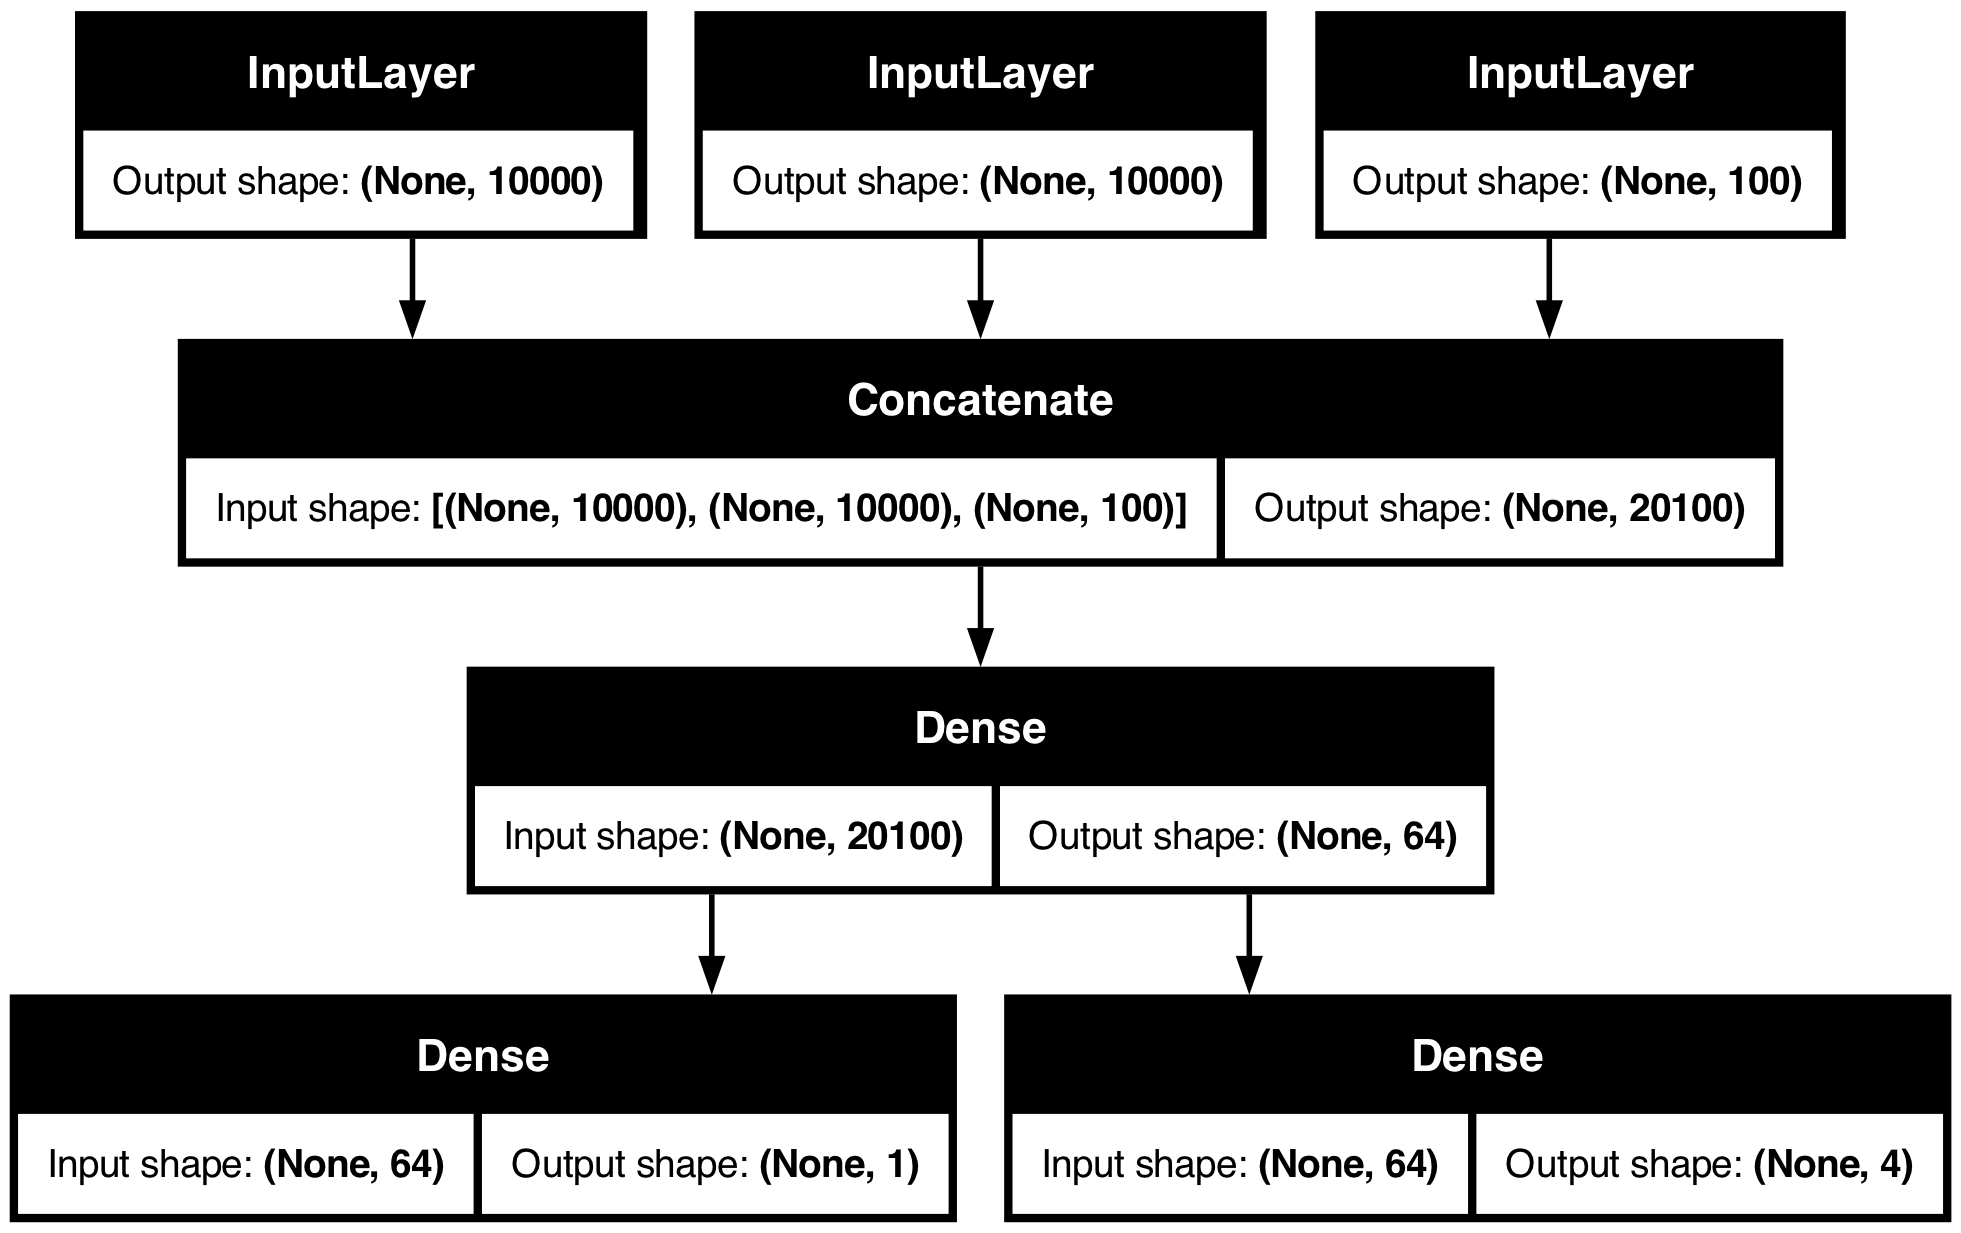

In [8]:
# Graphical visualization of the model with shape information
plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

The “None” in the tensor shapes represents the batch size: this model allows batches of any size.

###### Feature extraction

Access to layer connectivity also means that you can inspect and reuse individual nodes (layer calls) in the graph. The model.layers model property provides the list of layers that make up the model, and for each layer you can query layer.input and layer.output.

In [7]:
# Retrieving the inputs or outputs of a layer in a Functional model
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

This enables you to do feature extraction, creating models that reuse intermediate features from another model.
Let’s say you want to add another output to the previous model—you want to estimate how long a given issue ticket will take to resolve, a kind of difficulty rating. You could do this via a classification layer over three categories: “quick,” “medium,” and “difficult.” You don’t need to recreate and retrain a model from scratch. You can start from the intermediate features of your previous model, since you have access to them, like this.

In [8]:
# Creating a new model by reusing intermediate layer outputs
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

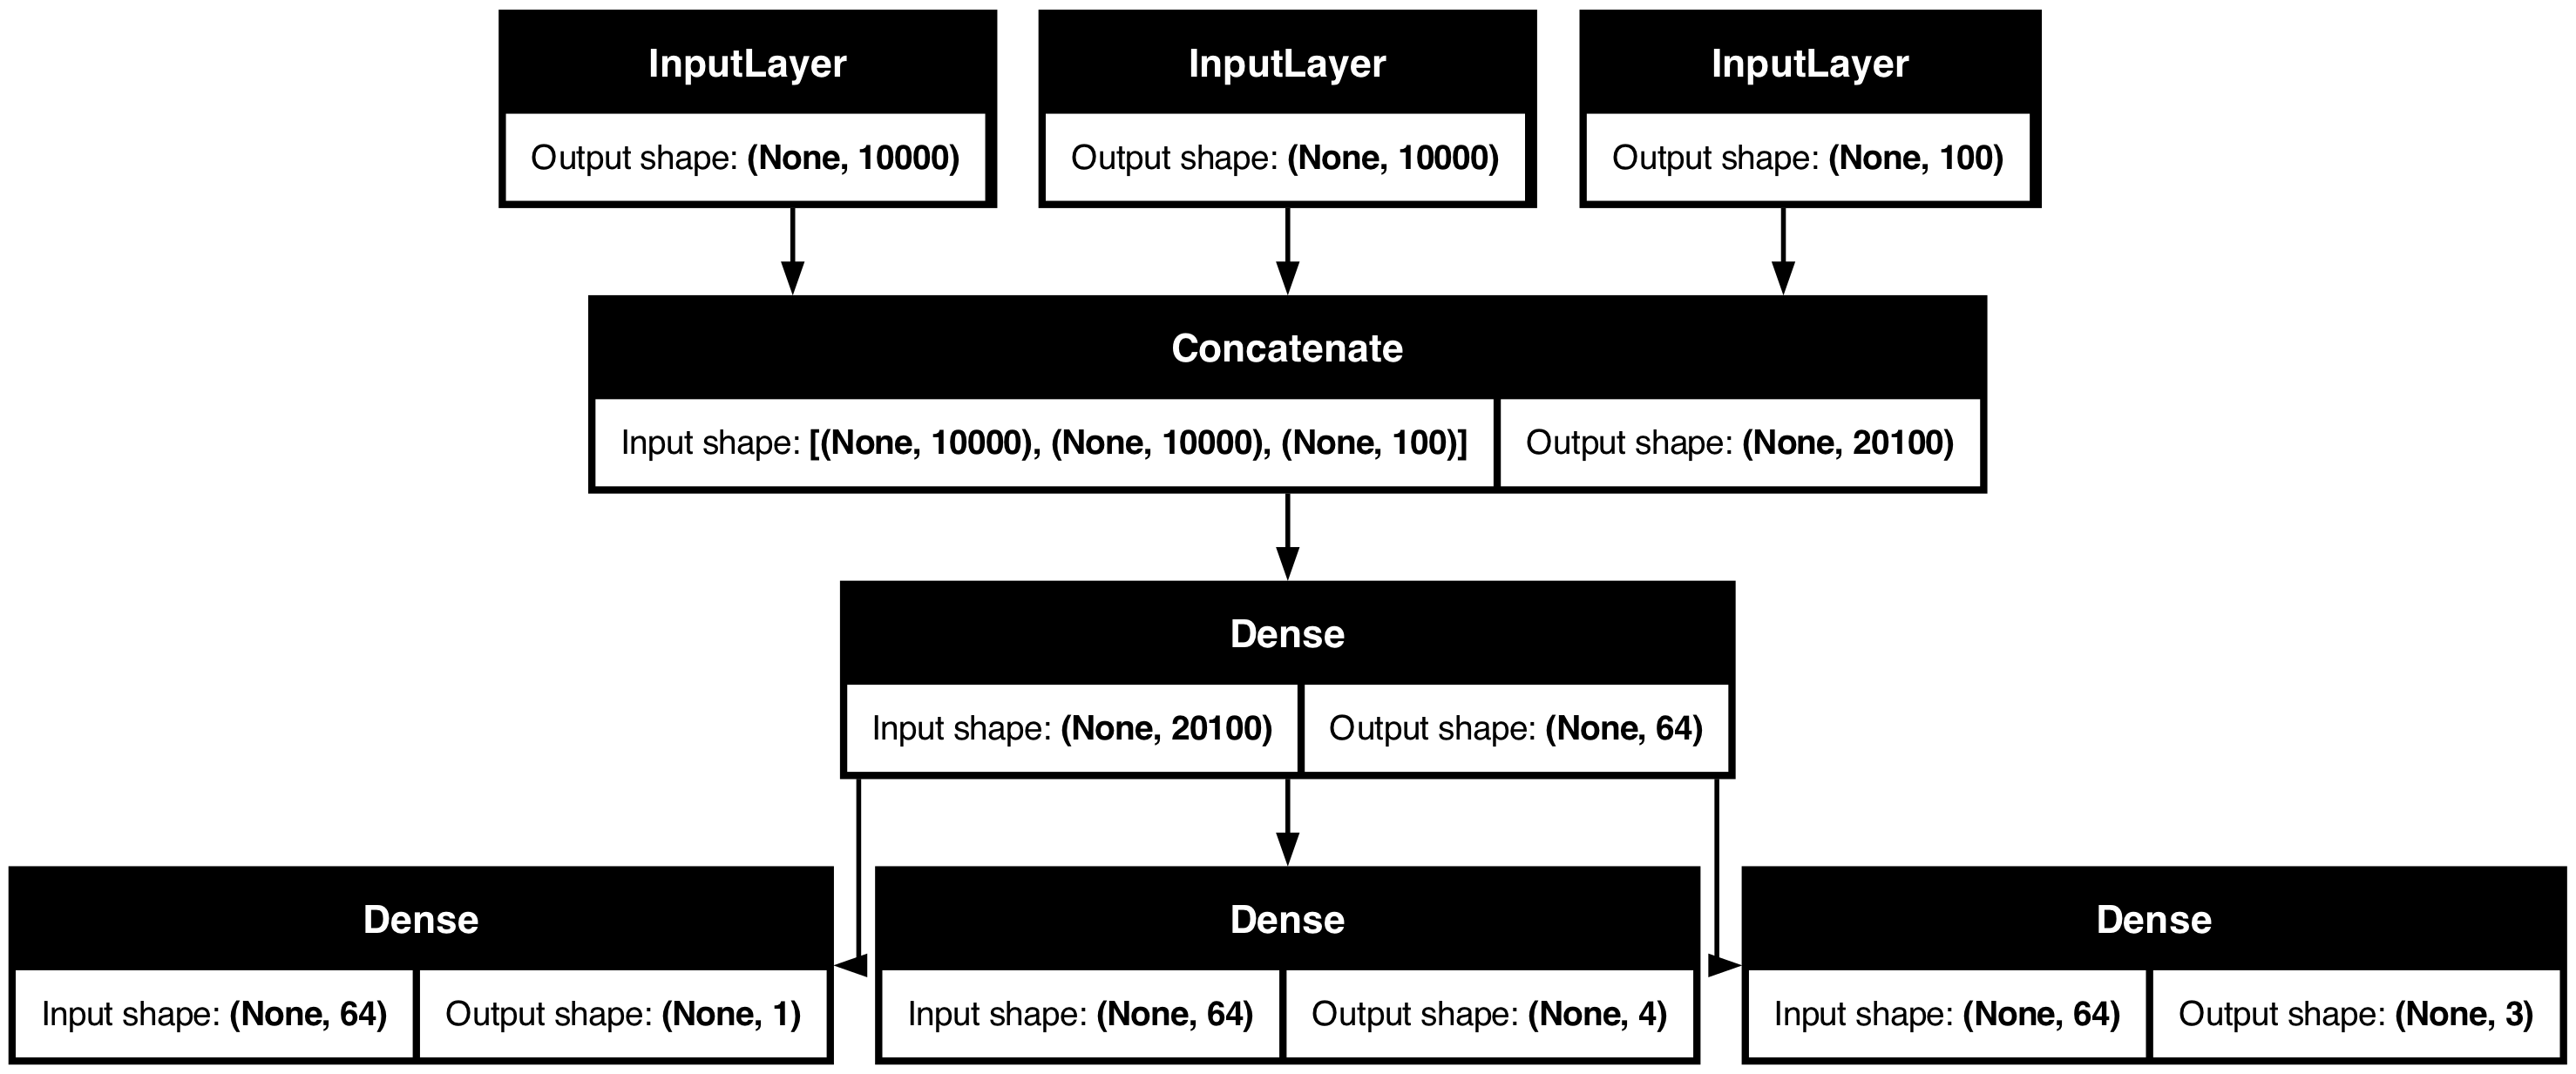

In [9]:
plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

The last model-building pattern you should know about is the most advanced one: Model subclassing. 
- In the __init__() method, define the layers the model will use.
- In the call() method, define the forward pass of the model, reusing the layers
previously created.
- Instantiate your subclass, and call it on data to create its weights.

Let’s take a look at a simple example: we will reimplement the customer support ticket management model using a Model subclass.

In [8]:
# A simple subclassed model
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

Once you’ve defined the model, you can instantiate it. Note that it will only create its weights the first time you call it on some data, much like Layer subclasses:

In [9]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

You can compile and train a Model subclass just like a Sequential or Functional
model:

In [10]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2905 - categorical_crossentropy_loss: 46.9994 - loss: 47.2877 - mean_absolute_error: 0.4562 - mean_squared_error_loss: 0.2883
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5533 - categorical_crossentropy_loss: 26.1902 - loss: 26.4935 - mean_absolute_error: 0.4736 - mean_squared_error_loss: 0.3034
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


The Model subclassing workflow is the most flexible way to build a model. It enables you to build models that cannot be expressed as directed acyclic graphs of layers— imagine, for instance, a model where the call() method uses layers inside a for loop, or even calls them recursively. Anything is possible—you’re in charge.

##### BEWARE: WHAT SUBCLASSED MODELS DON’T SUPPORT

This freedom comes at a cost: with subclassed models, you are responsible for more of the model logic, which means your potential error surface is much larger. As a result, you will have more debugging work to do. 

Functional and subclassed models are also substantially different in nature. 
- A Functional model is an explicit data structure—a graph of layers, which you can view, inspect, and modify. 
- A subclassed model is a piece of bytecode—a Python class with a call() method that contains raw code. 

This is the source of the subclassing workflow’s flexibility—you can code up whatever functionality you like—but it introduces new limitations.
1. For instance, because the way layers are connected to each other is hidden inside the body of the call() method, you cannot access that information. 
2. Calling summary() will not display layer connectivity, and you cannot plot the model topology via plot_model(). Likewise, if you have a subclassed model, you cannot access the nodes of the graph of layers to do feature extraction because there is simply no graph. Once the model is instantiated, its forward pass becomes a complete black box.

### Mixing and matching different components

Crucially, choosing one of these patterns—the Sequential model, the Functional API, or Model subclassing—does not lock you out of the others. All models in the Keras API can smoothly interoperate with each other.

For instance, we can use a subclassed layer or model in a Functional model.

In [11]:
# Creating a Functional model that includes a subclassed model
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

Inversely, we can use a Functional model as part of a subclassed layer or model.


In [13]:
# Creating a subclassed model that includes a Functional model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

## Using built-in training and evaluation loops

The principle of progressive disclosure of complexity also applies to model training. Keras offers various workflows for training models, and we are already familiar with the compile(), fit(), evaluate(), and predict() workflow.

There are a couple of ways you can customize this simple workflow:
- Provide your own custom metrics.
- Pass callbacks to the fit() method to schedule actions to be taken at specific points during training. 

Let’s take a look at these.

### Writing your own metrics

Metrics are key to measuring a model's performance, in particular, to measuring the difference between its performance on the training data and its performance on the test data. 
Commonly used metrics for classification and regression are already part of the built-in keras.metrics module, and most of the time that’s what you will use. But if you’re doing anything out of the ordinary, you will need to be able to write your own metrics. It’s simple!
A Keras metric is a subclass of the keras.metrics.Metric class. Like layers, a metric has an internal state stored in TensorFlow variables. Unlike layers, these variables aren’t updated via backpropagation, so you have to write the state-update logic yourself, which happens in the update_state() method.

For example, here’s a simple custom metric that measures the root mean squared error (RMSE).

In [14]:
# Implementing a custom metric by subclassing the Metric class
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric): # Subclass the Metric class
    # Define the state variables in the constructor. Like for layers, you have access to the add_weight() method.
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")
    # Implement the state update logic in update_state(). The y_true argument is the targets (or labels) for one batch, while y_pred represents the corresponding predictions from the model. You can ignore the sample_weight argument—we won’t use it here.
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1]) # To match our MNIST model, we expect categorical predictions and integer labels
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

Custom metrics can be used just like built-in ones. Let’s test-drive our own metric:

In [19]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])

model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8592 - loss: 0.4570 - rmse: 0.4433 - val_accuracy: 0.9580 - val_loss: 0.1508 - val_rmse: 0.2541
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9494 - loss: 0.1723 - rmse: 0.2774 - val_accuracy: 0.9683 - val_loss: 0.1155 - val_rmse: 0.2214
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9609 - loss: 0.1321 - rmse: 0.2435 - val_accuracy: 0.9714 - val_loss: 0.1087 - val_rmse: 0.2104
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9674 - loss: 0.1174 - rmse: 0.2215


### Using callbacks

Launching a training run on a large dataset for tens of epochs using model.fit() can be a bit like launching a paper airplane: past the initial impulse, you don’t have any control over its trajectory or its landing spot. If you want to avoid bad outcomes (and thus wasted paper airplanes), it’s smarter to use, not a paper plane, but a drone that can sense its environment, send data back to its operator, and automatically make steering decisions based on its current state. The Keras callbacks API will help you transform your call to model.fit() from a paper airplane into a smart, autonomous drone that can self-introspect and dynamically take action.

A callback is an object (a class instance implementing specific methods) that is passed to the model in the call to fit() and that is called by the model at various points during training. It has access to all the available data about the state of the model and its performance, and it can take action: interrupt training, save a model, load a different weight set, or otherwise alter the state of the model.

Here are some examples of ways you can use callbacks:
- Model checkpointing—Saving the current state of the model at different points during training.
- Early stopping—Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
- Dynamically adjusting the value of certain parameters during training—Such as the learning rate of the optimizer.
- Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated—The fit() progress bar that you’re familiar with is in fact a callback!

The keras.callbacks module includes a number of built-in callbacks (this is not an exhaustive list):
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

Let’s review two of them to give you an idea of how to use them: EarlyStopping and ModelCheckpoint.

##### THE EARLYSTOPPING AND MODELCHECKPOINT CALLBACKS

When you’re training a model, there are many things you can’t predict from the start. In particular, you can’t tell how many epochs will be needed to get to an optimal validation loss. Our examples so far have adopted the strategy of training for enough epochs that you begin overfitting, using the first run to figure out the proper number of epochs to train for, and then finally launching a new training run from scratch using this optimal number. Of course, this approach is wasteful. A much better way to handle this is to stop training when you measure that the validation loss is no longer improving. This can be achieved using the EarlyStopping callback.
The EarlyStopping callback interrupts training once a target metric being monitored has stopped improving for a fixed number of epochs. This callback is typically used in combination with ModelCheckpoint, which lets you continually save the model during training (and, optionally, save only the current best model so far: the version of the model that achieved the best performance at the end of an epoch).

In [20]:
# Using the callbacks argument in the fit() method
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8664 - loss: 0.4475 - val_accuracy: 0.9588 - val_loss: 0.1474
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9531 - loss: 0.1651 - val_accuracy: 0.9677 - val_loss: 0.1167
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9647 - loss: 0.1248 - val_accuracy: 0.9710 - val_loss: 0.1011
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9684 - loss: 0.1130 - val_accuracy: 0.9748 - val_loss: 0.0958
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9718 - loss: 0.1033 - val_accuracy: 0.9748 - val_loss: 0.0967
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9743 - loss: 0.0957 - val_accuracy: 0.9768 - val_loss: 0.0959
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9764 - loss: 0.0871 - val_accuracy: 0.9782 - val_loss: 0.0943
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9792 - loss:

Note that you can always save models manually after training as well—just call model.save('my_checkpoint_path').

In [ ]:
# Loading a model from a saved file
model = keras.models.load_model("checkpoint_path.keras")

##### Writing your own callbacks

If you need to take a specific action during training that isn’t covered by one of the built-in callbacks, you can write your own callback. Callbacks are implemented by subclassing the keras.callbacks.Callback class. You can then implement any number of the following transparently named methods, which are called at various points during training:

- on_epoch_begin(epoch, logs) -> Called at the start of every epoch
- on_epoch_end(epoch, logs) -> Called at the end of every epoch
- on_batch_begin(batch, logs) -> Called right before processing each batch
- on_batch_end(batch, logs) -> Called right after processing each batch
- on_train_begin(logs) -> Called at the start of training
- on_train_end(logs) -> Called at the end of training

These methods are all called with a logs argument, which is a dictionary containing information about the previous batch, epoch, or training run—training and validation metrics, and so on. The on_epoch_* and on_batch_* methods also take the epoch or batch index as their first argument (an integer).
Here’s a simple example that saves a list of per-batch loss values during training and saves a graph of these values at the end of each epoch.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8675 - loss: 0.4412 - val_accuracy: 0.9568 - val_loss: 0.1515
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9518 - loss: 0.1672 - val_accuracy: 0.9674 - val_loss: 0.1236
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9626 - loss: 0.1320 - val_accuracy: 0.9731 - val_loss: 0.1043
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9671 - loss: 0.1123 - val_accuracy: 0.9732 - val_loss: 0.1045
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9724 - loss: 0.1026 - val_accuracy: 0.9769 - val_loss: 0.0913
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9755 - loss: 0.0885 - val_accuracy: 0.9763 - val_loss: 0.0939
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9767 - loss: 0.0868 - val_accuracy: 0.9794 - val_loss: 0.0879
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9783 - loss: 

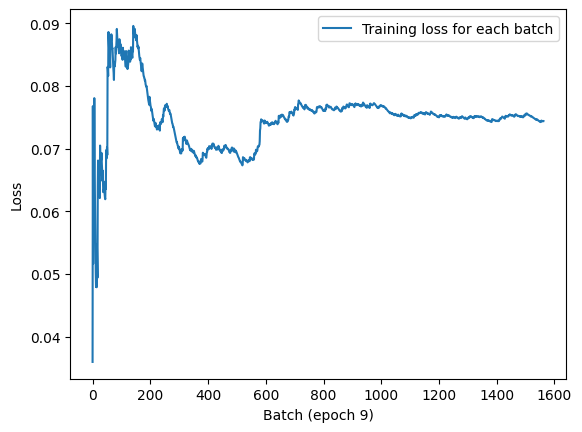

In [28]:
# Creating a custom callback by subclassing the Callback class
import matplotlib.pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard